# EDA
___
___

## Load the dataset
___

In [2]:
from tabulate import tabulate
import pandas as pd

file_path = '/Users/pranavkhot/Documents/STOCKS/data/Ford_Preprocessed.csv'
ford_data = pd.read_csv(file_path)

## Summary Statistics
___

In [3]:
summary_statistics = ford_data.describe()
print("Summary Statistics:")
print(tabulate(summary_statistics, headers='keys', tablefmt='fancy_grid', showindex=True))

Summary Statistics:
╒═══════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│       │        Open │        High │         Low │       Close │   Adj Close │      Volume │
╞═══════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ count │ 1258        │ 1258        │ 1258        │ 1258        │ 1258        │ 1258        │
├───────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ mean  │    0.351085 │    0.338401 │    0.360502 │    0.353604 │    0.36249  │    0.177152 │
├───────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ std   │    0.177418 │    0.174012 │    0.175329 │    0.172781 │    0.181641 │    0.112167 │
├───────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ min   │    0        │    0        │    0        │    0        │    0        │    0        │
├───────┼─────────────┼─────────────┼───

## Trend Analysis 
___

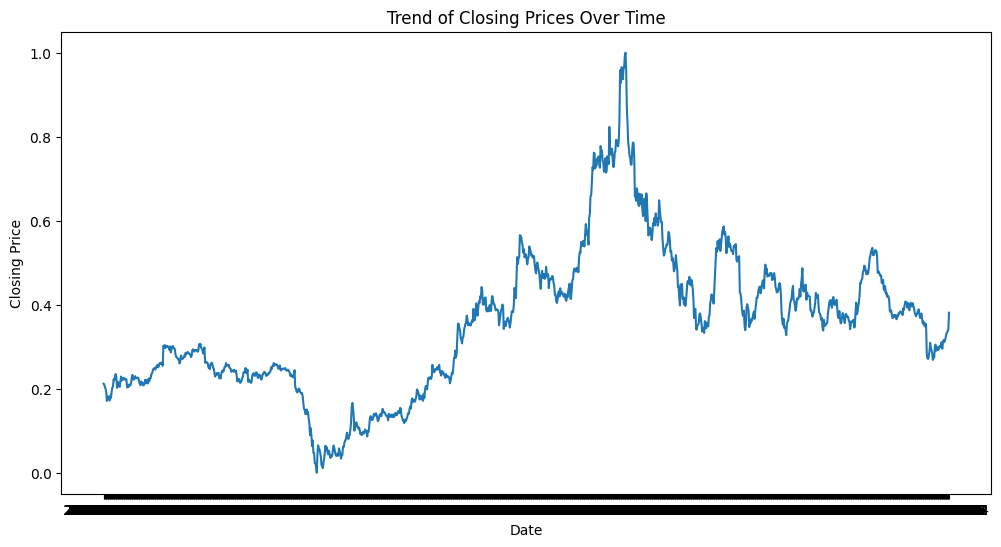

In [4]:
import matplotlib.pyplot as plt

# Plotting closing price over time
plt.figure(figsize=(12, 6))
plt.plot(ford_data['Date'], ford_data['Close'])
plt.title('Trend of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


*  The time series data shows multiple periods of rising and falling trends, indicative of the stock's reactive nature to market conditions without a discernible persistent upward or downward trend.
*  The absence of breaks or gaps in the plot suggests consistent data availability and recording, implying that the data set is complete over the represented time frame.

## Volume Analysis
___

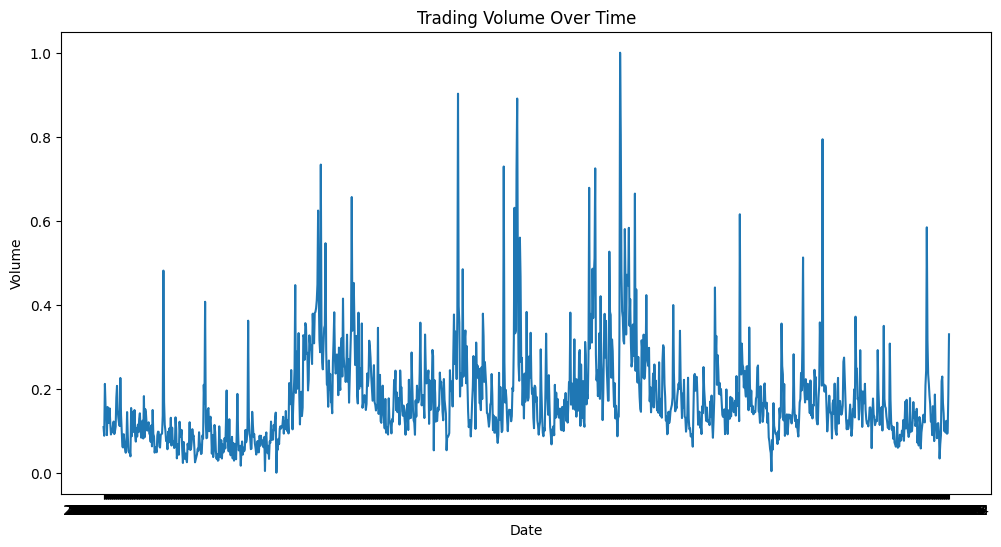

In [5]:
# Plotting trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(ford_data['Date'], ford_data['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


*  The y-axis, which represents trading volume, is scaled between 0 and 1, suggesting that the raw volume data has been normalized using Min-Max scaling, likely to facilitate comparison with other normalized variables or to prepare the data for input into a machine learning model.
*  There are several noticeable spikes in trading volume throughout the time series. These spikes could correspond to specific events or dates of significant market activity, such as earnings reports, market news, or changes in investor sentiment.
*  The graph shows variability in trading volume, with periods of both high and low activity. This variability could indicate changes in liquidity or trader interest in the stock at different times.

## Correlation Analysis
___

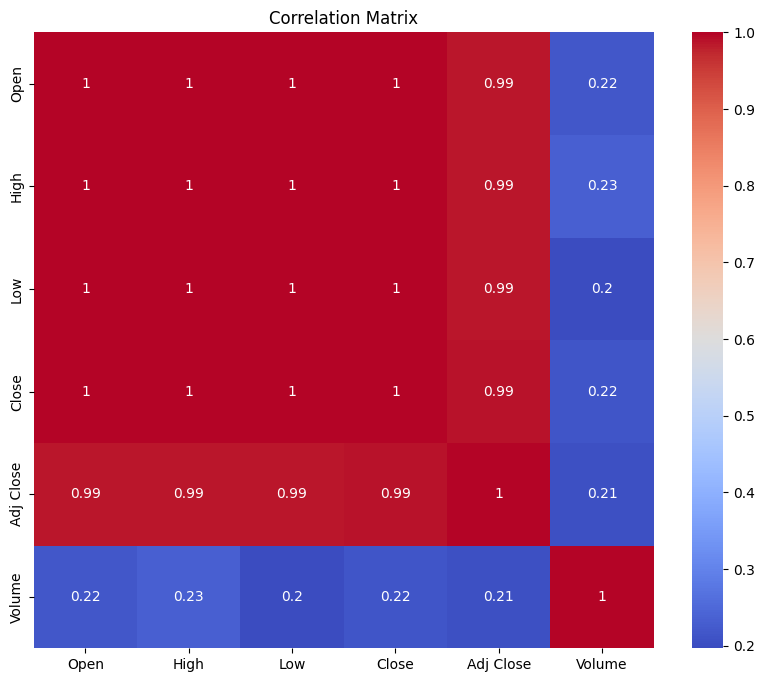

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluding the non-numeric 'Date' column
numeric_data = ford_data.select_dtypes(include=[float, int])

# Correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*   The 'Open', 'High', 'Low', 'Close', and 'Adj Close' values have a very high correlation with each other, as indicated by the deep red colors and the correlation values being 1 or very close to 1. This is expected since these prices within the same trading day are often closely related.
*  The strong correlations among the price features imply redundancy, which means that for predictive modeling, using all of these features might not add additional value. The lower correlation with volume could mean that volume might provide some independent information for such models.

## Outlier Detection
___

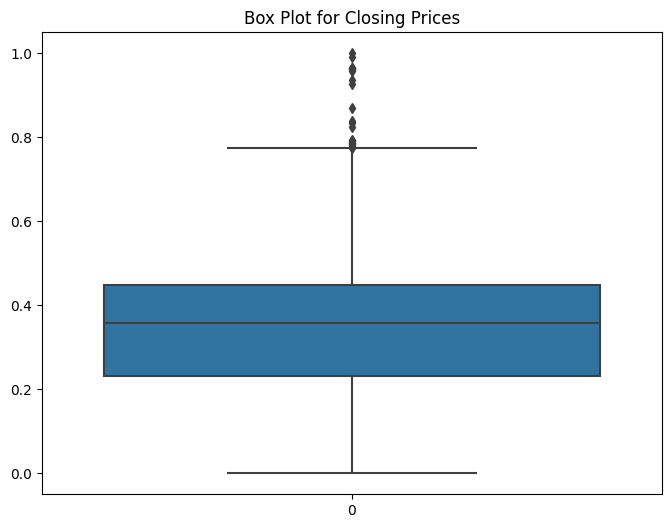

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(ford_data['Close'])
plt.title('Box Plot for Closing Prices')
plt.show()


There is a concentration of closing prices within the box, suggesting a consistent range for the majority of the data.
The presence of outliers indicates periods of significant price changes, which could be due to market events, earnings reports, or other external factors.